In [4]:
import sys
import pandas as pd 
import numpy as np
#np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import plotly.express as px
%matplotlib inline

In [5]:
%%time
os.chdir(r'C:\Users\musab\allExtData')
all_files=glob.glob('*csv')
print(all_files)

['big_testS.csv', 'big_trainS.csv']
Wall time: 995 µs


In [6]:
big_train_df=pd.read_csv('big_trainS.csv')
big_test_df=pd.read_csv('big_testS.csv')

# Wind Speed

For MAE, lower values indicate better performance. The model with the lowest MAE is CatBoost with MAE: 0.2240596677482703.
For MSE and RMSE, lower values indicate better performance. Again, CatBoost has the lowest values for both metrics: MSE: 0.0894753192414226 and RMSE: 0.29912425385017277.
For the R2 Score, a higher value closer to 1 indicates better performance. CatBoost has the highest R2 Score: 0.9972223962697029.

In [7]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import re

def clean_feature_name(feature_name):
    cleaned_name = re.sub(r'\W+', '', feature_name)
    cleaned_name = cleaned_name.replace(' ', '_')
    return cleaned_name

X_train = big_train_df.drop(['wind_speed', 'yaw_error', 'turbulence'], axis=1)
y_train = big_train_df['wind_speed']

X_test = big_test_df.drop(['wind_speed', 'yaw_error', 'turbulence'], axis=1)
y_test = big_test_df['wind_speed']

X_train.columns = [clean_feature_name(feature_name) for feature_name in X_train.columns]
X_test.columns = [clean_feature_name(feature_name) for feature_name in X_test.columns]

rf_model = RandomForestRegressor(n_estimators=100)
dt_model = DecisionTreeRegressor()
xgb_model = XGBRegressor()
catboost_model = CatBoostRegressor()
lgbm_model = LGBMRegressor()

rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
catboost_model.fit(X_train, y_train)
lgbm_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_catboost = catboost_model.predict(X_test)
y_pred_lgbm = lgbm_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, y_pred_rf)

dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, y_pred_dt)

xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, y_pred_xgb)

catboost_mae = mean_absolute_error(y_test, y_pred_catboost)
catboost_mse = mean_squared_error(y_test, y_pred_catboost)
catboost_rmse = np.sqrt(catboost_mse)
catboost_r2 = r2_score(y_test, y_pred_catboost)

lgbm_mae = mean_absolute_error(y_test, y_pred_lgbm)
lgbm_mse = mean_squared_error(y_test, y_pred_lgbm)
lgbm_rmse = np.sqrt(lgbm_mse)
lgbm_r2 = r2_score(y_test, y_pred_lgbm)



metrics = {
    'Random Forest': {'MAE': rf_mae, 'MSE': rf_mse, 'RMSE': rf_rmse, 'R2 Score': rf_r2},
    'Decision Tree': {'MAE': dt_mae, 'MSE': dt_mse, 'RMSE': dt_rmse, 'R2 Score': dt_r2},
    'XGBoost': {'MAE': xgb_mae, 'MSE': xgb_mse, 'RMSE': xgb_rmse, 'R2 Score': xgb_r2},
    'CatBoost': {'MAE': catboost_mae, 'MSE': catboost_mse, 'RMSE': catboost_rmse, 'R2 Score': catboost_r2},
    'LightGBM': {'MAE': lgbm_mae, 'MSE': lgbm_mse, 'RMSE': lgbm_rmse, 'R2 Score': lgbm_r2}
}

for model, model_metrics in metrics.items():
    print(f"Metrics for {model}:")
    for metric_name, metric_value in model_metrics.items():
        print(f"{metric_name}: {metric_value}")
    print()


Learning rate set to 0.058759
0:	learn: 5.7944068	total: 170ms	remaining: 2m 50s
1:	learn: 5.4693537	total: 192ms	remaining: 1m 35s
2:	learn: 5.1629287	total: 210ms	remaining: 1m 9s
3:	learn: 4.8781665	total: 219ms	remaining: 54.5s
4:	learn: 4.6026186	total: 228ms	remaining: 45.3s
5:	learn: 4.3434547	total: 238ms	remaining: 39.5s
6:	learn: 4.0996168	total: 248ms	remaining: 35.2s
7:	learn: 3.8762198	total: 257ms	remaining: 31.9s
8:	learn: 3.6615834	total: 265ms	remaining: 29.2s
9:	learn: 3.4596276	total: 273ms	remaining: 27s
10:	learn: 3.2689112	total: 281ms	remaining: 25.3s
11:	learn: 3.0878241	total: 289ms	remaining: 23.8s
12:	learn: 2.9170554	total: 297ms	remaining: 22.6s
13:	learn: 2.7569391	total: 307ms	remaining: 21.6s
14:	learn: 2.6081295	total: 318ms	remaining: 20.9s
15:	learn: 2.4681285	total: 329ms	remaining: 20.2s
16:	learn: 2.3328060	total: 339ms	remaining: 19.6s
17:	learn: 2.2087749	total: 351ms	remaining: 19.1s
18:	learn: 2.0910782	total: 359ms	remaining: 18.6s
19:	learn: 

In [8]:
print('Random Forest Metrics:')
print('MAE:', rf_mae)
print('MSE:', rf_mse)
print('RMSE:', rf_rmse)
print('R2 Score:', rf_r2)
print('-----------------------------')
print('Decision Tree Metrics:')
print('MAE:', dt_mae)
print('MSE:', dt_mse)
print('RMSE:', dt_rmse)
print('R2 Score:', dt_r2)
print('-----------------------------')
print('XGBoost Metrics:')
print('MAE:', xgb_mae)
print('MSE:', xgb_mse)
print('RMSE:', xgb_rmse)
print('R2 Score:', xgb_r2)
print('-----------------------------')
print('CatBoost Metrics:')
print('MAE:', catboost_mae)
print('MSE:', catboost_mse)
print('RMSE:', catboost_rmse)
print('R2 Score:', catboost_r2)
print('-----------------------------')
print('LightGBM Metrics:')
print('MAE:', lgbm_mae)
print('MSE:', lgbm_mse)
print('RMSE:', lgbm_rmse)
print('R2 Score:', lgbm_r2)


Random Forest Metrics:
MAE: 0.29865630138481764
MSE: 0.15693228927767433
RMSE: 0.39614680268515906
R2 Score: 0.9951283134187474
-----------------------------
Decision Tree Metrics:
MAE: 0.3604422476896244
MSE: 0.2632247102056822
RMSE: 0.5130542955727807
R2 Score: 0.9918286523795359
-----------------------------
XGBoost Metrics:
MAE: 0.2347136829690004
MSE: 0.10656772401062753
RMSE: 0.3264471228401738
R2 Score: 0.996691792661365
-----------------------------
CatBoost Metrics:
MAE: 0.2240596677482703
MSE: 0.0894753192414226
RMSE: 0.29912425385017277
R2 Score: 0.9972223962697029
-----------------------------
LightGBM Metrics:
MAE: 0.2337921544222342
MSE: 0.09302187538366107
RMSE: 0.30499487763511873
R2 Score: 0.9971122996793369


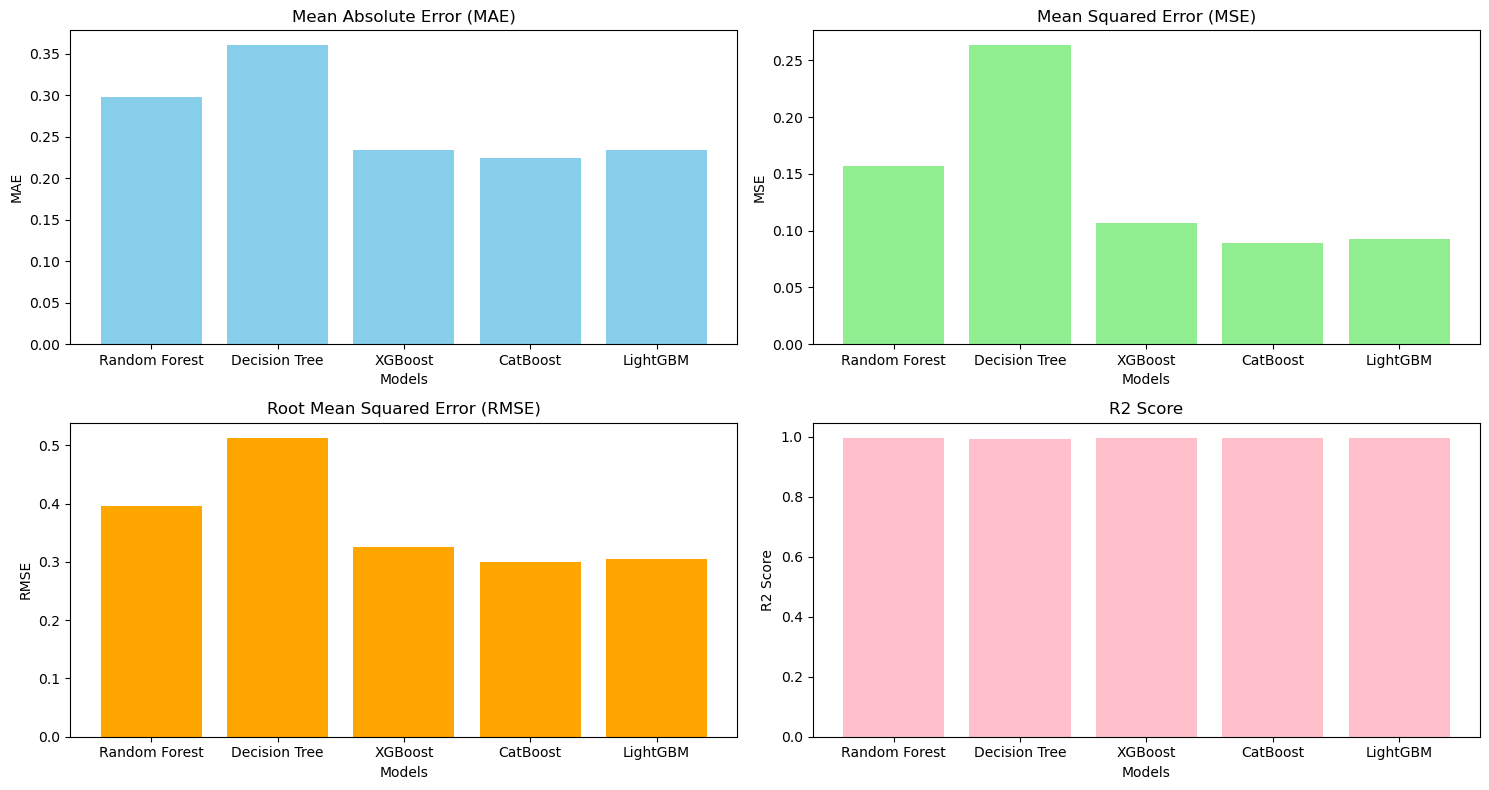

In [9]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Random Forest', 'Decision Tree', 'XGBoost', 'CatBoost', 'LightGBM']
mae_scores = [rf_mae, dt_mae, xgb_mae, catboost_mae, lgbm_mae]
mse_scores = [rf_mse, dt_mse, xgb_mse, catboost_mse, lgbm_mse]
rmse_scores = [rf_rmse, dt_rmse, xgb_rmse, catboost_rmse, lgbm_rmse]
r2_scores = [rf_r2, dt_r2, xgb_r2, catboost_r2, lgbm_r2]

plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.bar(models, mae_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('Mean Absolute Error (MAE)')

plt.subplot(2, 2, 2)
plt.bar(models, mse_scores, color='lightgreen')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('Mean Squared Error (MSE)')

plt.subplot(2, 2, 3)
plt.bar(models, rmse_scores, color='orange')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Root Mean Squared Error (RMSE)')

plt.subplot(2, 2, 4)
plt.bar(models, r2_scores, color='pink')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('R2 Score')

plt.tight_layout()
plt.show()


# Yaw Error

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import re

def clean_feature_name(feature_name):
    # Remove special characters
    cleaned_name = re.sub(r'\W+', '', feature_name)
    
    cleaned_name = cleaned_name.replace(' ', '_')
    
    return cleaned_name

X_train.columns = [clean_feature_name(feature_name) for feature_name in X_train.columns]

X_test.columns = [clean_feature_name(feature_name) for feature_name in X_test.columns]

rf_model = RandomForestRegressor(n_estimators=100)
dt_model = DecisionTreeRegressor()
xgb_model = XGBRegressor()
catboost_model = CatBoostRegressor()
lgbm_model = LGBMRegressor()

rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
catboost_model.fit(X_train, y_train)
lgbm_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_catboost = catboost_model.predict(X_test)
y_pred_lgbm = lgbm_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, y_pred_rf)

dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, y_pred_dt)

xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, y_pred_xgb)

catboost_mae = mean_absolute_error(y_test, y_pred_catboost)
catboost_mse = mean_squared_error(y_test, y_pred_catboost)
catboost_rmse = np.sqrt(catboost_mse)
catboost_r2 = r2_score(y_test, y_pred_catboost)

lgbm_mae = mean_absolute_error(y_test, y_pred_lgbm)
lgbm_mse = mean_squared_error(y_test, y_pred_lgbm)
lgbm_rmse = np.sqrt(lgbm_mse)
lgbm_r2 = r2_score(y_test, y_pred_lgbm)


metrics = {
    'Random Forest': {'MAE': rf_mae, 'MSE': rf_mse, 'RMSE': rf_rmse, 'R2 Score': rf_r2},
    'Decision Tree': {'MAE': dt_mae, 'MSE': dt_mse, 'RMSE': dt_rmse, 'R2 Score': dt_r2},
    'XGBoost': {'MAE': xgb_mae, 'MSE': xgb_mse, 'RMSE': xgb_rmse, 'R2 Score': xgb_r2},
    'CatBoost': {'MAE': catboost_mae, 'MSE': catboost_mse, 'RMSE': catboost_rmse, 'R2 Score': catboost_r2},
    'LightGBM': {'MAE': lgbm_mae, 'MSE': lgbm_mse, 'RMSE': lgbm_rmse, 'R2 Score': lgbm_r2}
}

for model, model_metrics in metrics.items():
    print(f"Metrics for {model}:")
    for metric_name, metric_value in model_metrics.items():
        print(f"{metric_name}: {metric_value}")
    print()


In [7]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train = big_train_df.drop(['wind_speed', 'yaw_error', 'turbulence'], axis=1) 
y_train = big_train_df['yaw_error'] 

X_test = big_test_df.drop(['wind_speed', 'yaw_error', 'turbulence'], axis=1) 
y_test = big_test_df['yaw_error']

rf_model = RandomForestRegressor(n_estimators=100)
dt_model = DecisionTreeRegressor()
xgb_model = XGBRegressor()
catboost_model = CatBoostRegressor()

rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
catboost_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_catboost = catboost_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, y_pred_rf)

dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, y_pred_dt)

xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, y_pred_xgb)

catboost_mae = mean_absolute_error(y_test, y_pred_catboost)
catboost_mse = mean_squared_error(y_test, y_pred_catboost)
catboost_rmse = np.sqrt(catboost_mse)
catboost_r2 = r2_score(y_test, y_pred_catboost)

metrics = {
    'Random Forest': {'MAE': rf_mae, 'MSE': rf_mse, 'RMSE': rf_rmse},
    'Decision Tree': {'MAE': dt_mae, 'MSE': dt_mse, 'RMSE': dt_rmse},
    'XGBoost': {'MAE': xgb_mae, 'MSE': xgb_mse, 'RMSE': xgb_rmse},
    'CatBoost': {'MAE': catboost_mae, 'MSE': catboost_mse, 'RMSE': catboost_rmse}
}






Learning rate set to 0.058759
0:	learn: 11.6833861	total: 11.6ms	remaining: 11.6s
1:	learn: 11.5298363	total: 22.2ms	remaining: 11.1s
2:	learn: 11.4039697	total: 32.5ms	remaining: 10.8s
3:	learn: 11.2643589	total: 42.6ms	remaining: 10.6s
4:	learn: 11.1335123	total: 51.7ms	remaining: 10.3s
5:	learn: 11.0086866	total: 60.8ms	remaining: 10.1s
6:	learn: 10.9051003	total: 70ms	remaining: 9.93s
7:	learn: 10.8038678	total: 78.5ms	remaining: 9.74s
8:	learn: 10.7224785	total: 87.5ms	remaining: 9.63s
9:	learn: 10.6395027	total: 96.6ms	remaining: 9.56s
10:	learn: 10.5591457	total: 107ms	remaining: 9.59s
11:	learn: 10.4862083	total: 117ms	remaining: 9.61s
12:	learn: 10.4275098	total: 125ms	remaining: 9.52s
13:	learn: 10.3592447	total: 134ms	remaining: 9.46s
14:	learn: 10.2996857	total: 143ms	remaining: 9.38s
15:	learn: 10.2327797	total: 151ms	remaining: 9.3s
16:	learn: 10.1710691	total: 160ms	remaining: 9.25s
17:	learn: 10.1247984	total: 169ms	remaining: 9.19s
18:	learn: 10.0802950	total: 177ms	re

In [8]:
# Print the evaluation metrics
print('Random Forest Metrics:')
print('MAE:', rf_mae)
print('MSE:', rf_mse)
print('RMSE:', rf_rmse)
print('R2 Score:', rf_r2)
print('-----------------------------')
print('Decision Tree Metrics:')
print('MAE:', dt_mae)
print('MSE:', dt_mse)
print('RMSE:', dt_rmse)
print('R2 Score:', dt_r2)
print('-----------------------------')
print('XGBoost Metrics:')
print('MAE:', xgb_mae)
print('MSE:', xgb_mse)
print('RMSE:', xgb_rmse)
print('R2 Score:', xgb_r2)
print('-----------------------------')
print('CatBoost Metrics:')
print('MAE:', catboost_mae)
print('MSE:', catboost_mse)
print('RMSE:', catboost_rmse)
print('R2 Score:', catboost_r2)


Random Forest Metrics:
MAE: 6.4494292194133545
MSE: 73.37911121375824
RMSE: 8.566160821147257
R2 Score: 0.47600409713907366
-----------------------------
Decision Tree Metrics:
MAE: 9.104878599994736
MSE: 164.91061207662187
RMSE: 12.84175268709929
R2 Score: -0.17761694898037317
-----------------------------
XGBoost Metrics:
MAE: 5.457038799753718
MSE: 58.95822770832256
RMSE: 7.678426121824873
R2 Score: 0.578982775232768
-----------------------------
CatBoost Metrics:
MAE: 5.318143226705687
MSE: 55.2722798878313
RMSE: 7.4345329300388
R2 Score: 0.6053039111003069


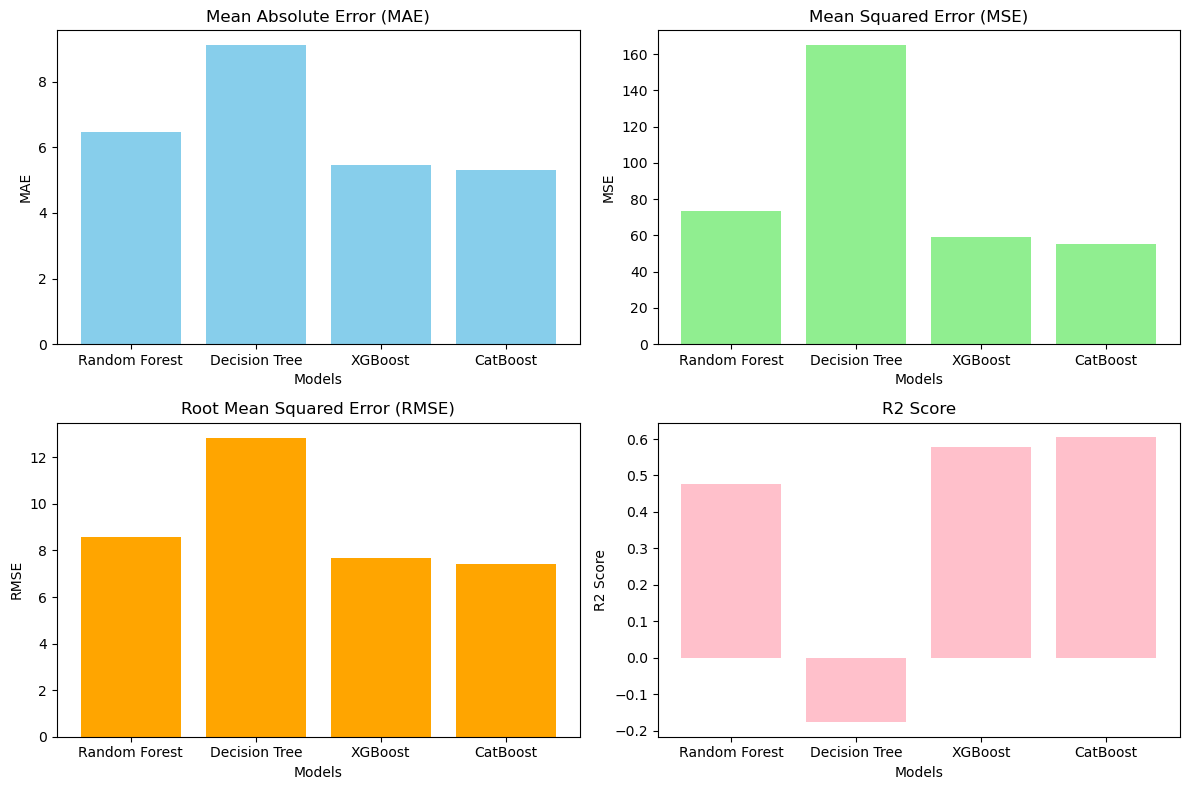

In [9]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Random Forest', 'Decision Tree', 'XGBoost', 'CatBoost']
mae_scores = [rf_mae, dt_mae, xgb_mae, catboost_mae]
mse_scores = [rf_mse, dt_mse, xgb_mse, catboost_mse]
rmse_scores = [rf_rmse, dt_rmse, xgb_rmse, catboost_rmse]
r2_scores = [rf_r2, dt_r2, xgb_r2, catboost_r2]

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.bar(models, mae_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('Mean Absolute Error (MAE)')

plt.subplot(2, 2, 2)
plt.bar(models, mse_scores, color='lightgreen')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('Mean Squared Error (MSE)')

plt.subplot(2, 2, 3)
plt.bar(models, rmse_scores, color='orange')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Root Mean Squared Error (RMSE)')

plt.subplot(2, 2, 4)
plt.bar(models, r2_scores, color='pink')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('R2 Score')

plt.tight_layout()
plt.show()


# Turbulence

In [10]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train = big_train_df.drop(['wind_speed', 'yaw_error', 'turbulence'], axis=1) 
y_train = big_train_df['turbulence'] 

X_test = big_test_df.drop(['wind_speed', 'yaw_error', 'turbulence'], axis=1) 
y_test = big_test_df['turbulence']

rf_model = RandomForestRegressor(n_estimators=100)
dt_model = DecisionTreeRegressor()
xgb_model = XGBRegressor()
catboost_model = CatBoostRegressor()

rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
catboost_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_catboost = catboost_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, y_pred_rf)

dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, y_pred_dt)

xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, y_pred_xgb)

catboost_mae = mean_absolute_error(y_test, y_pred_catboost)
catboost_mse = mean_squared_error(y_test, y_pred_catboost)
catboost_rmse = np.sqrt(catboost_mse)
catboost_r2 = r2_score(y_test, y_pred_catboost)

metrics = {
    'Random Forest': {'MAE': rf_mae, 'MSE': rf_mse, 'RMSE': rf_rmse},
    'Decision Tree': {'MAE': dt_mae, 'MSE': dt_mse, 'RMSE': dt_rmse},
    'XGBoost': {'MAE': xgb_mae, 'MSE': xgb_mse, 'RMSE': xgb_rmse},
    'CatBoost': {'MAE': catboost_mae, 'MSE': catboost_mse, 'RMSE': catboost_rmse}
}






Learning rate set to 0.058759
0:	learn: 0.0267077	total: 12.1ms	remaining: 12.1s
1:	learn: 0.0256108	total: 22.9ms	remaining: 11.4s
2:	learn: 0.0245551	total: 33.3ms	remaining: 11.1s
3:	learn: 0.0235299	total: 44.3ms	remaining: 11s
4:	learn: 0.0227049	total: 52.8ms	remaining: 10.5s
5:	learn: 0.0217999	total: 63ms	remaining: 10.4s
6:	learn: 0.0209922	total: 72.1ms	remaining: 10.2s
7:	learn: 0.0201437	total: 80.8ms	remaining: 10s
8:	learn: 0.0194728	total: 90ms	remaining: 9.91s
9:	learn: 0.0187635	total: 99ms	remaining: 9.8s
10:	learn: 0.0180832	total: 108ms	remaining: 9.74s
11:	learn: 0.0174760	total: 117ms	remaining: 9.66s
12:	learn: 0.0168984	total: 127ms	remaining: 9.63s
13:	learn: 0.0164615	total: 136ms	remaining: 9.55s
14:	learn: 0.0159216	total: 146ms	remaining: 9.56s
15:	learn: 0.0154445	total: 155ms	remaining: 9.54s
16:	learn: 0.0149400	total: 164ms	remaining: 9.48s
17:	learn: 0.0144503	total: 174ms	remaining: 9.47s
18:	learn: 0.0140480	total: 182ms	remaining: 9.4s
19:	learn: 0.

In [11]:
# Print the evaluation metrics
print('Random Forest Metrics:')
print('MAE:', rf_mae)
print('MSE:', rf_mse)
print('RMSE:', rf_rmse)
print('R2 Score:', rf_r2)
print('-----------------------------')
print('Decision Tree Metrics:')
print('MAE:', dt_mae)
print('MSE:', dt_mse)
print('RMSE:', dt_rmse)
print('R2 Score:', dt_r2)
print('-----------------------------')
print('XGBoost Metrics:')
print('MAE:', xgb_mae)
print('MSE:', xgb_mse)
print('RMSE:', xgb_rmse)
print('R2 Score:', xgb_r2)
print('-----------------------------')
print('CatBoost Metrics:')
print('MAE:', catboost_mae)
print('MSE:', catboost_mse)
print('RMSE:', catboost_rmse)
print('R2 Score:', catboost_r2)


Random Forest Metrics:
MAE: 0.004748010029487101
MSE: 3.917918239031888e-05
RMSE: 0.006259327630849729
R2 Score: 0.9571415688377019
-----------------------------
Decision Tree Metrics:
MAE: 0.006405832745279362
MSE: 8.214964752648083e-05
RMSE: 0.009063644274047876
R2 Score: 0.9101358221709416
-----------------------------
XGBoost Metrics:
MAE: 0.004099408706366005
MSE: 2.8912209258878607e-05
RMSE: 0.005377007463160025
R2 Score: 0.9683726955318548
-----------------------------
CatBoost Metrics:
MAE: 0.003327524330655263
MSE: 2.0067865907102266e-05
RMSE: 0.004479717168204067
R2 Score: 0.9780475957618172


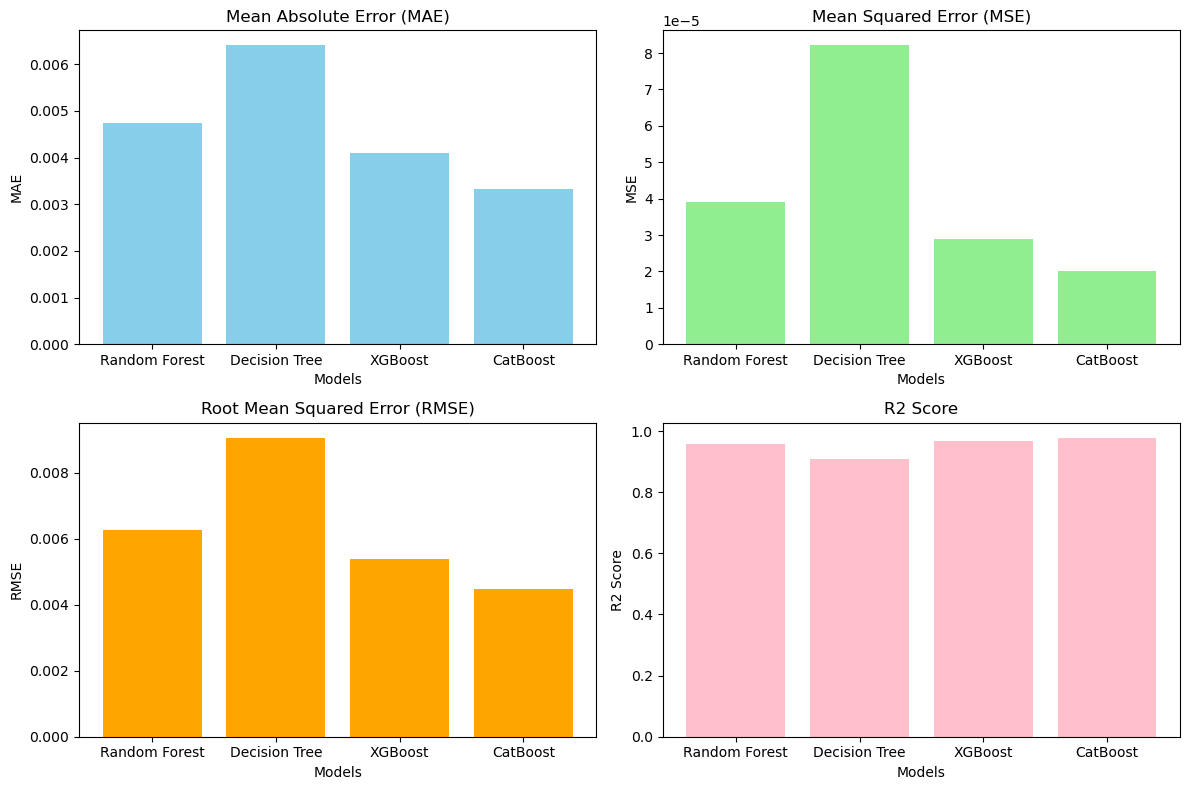

In [12]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Random Forest', 'Decision Tree', 'XGBoost', 'CatBoost']
mae_scores = [rf_mae, dt_mae, xgb_mae, catboost_mae]
mse_scores = [rf_mse, dt_mse, xgb_mse, catboost_mse]
rmse_scores = [rf_rmse, dt_rmse, xgb_rmse, catboost_rmse]
r2_scores = [rf_r2, dt_r2, xgb_r2, catboost_r2]

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.bar(models, mae_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('Mean Absolute Error (MAE)')

plt.subplot(2, 2, 2)
plt.bar(models, mse_scores, color='lightgreen')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('Mean Squared Error (MSE)')

plt.subplot(2, 2, 3)
plt.bar(models, rmse_scores, color='orange')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Root Mean Squared Error (RMSE)')

plt.subplot(2, 2, 4)
plt.bar(models, r2_scores, color='pink')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('R2 Score')

plt.tight_layout()
plt.show()
